<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap 04. 분류**

### **01. 분류의 개요**
- `분류`
  - 지도학습의 대표적인 유형
  - 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
  - 머신러닝 알고리즘
    - 나이브 베이즈
    - 로지스틱 회귀
    - 결정 트리
    - 서포트 벡터 머신
    - 최소 근접 알고리즘
    - 신경망
    - 앙상블

- `앙상블 모형(Ensemble model)`
  - 서로 다른/또는 같은 알고리즘을 결합
  - 일반적으로 배깅과 부스팅 방식으로 분류
    - `배깅(Bagging)`
      - 랜덤 포레스트 (Random Forest)
    - `부스팅(Boosting)`
      - 그래디언트 부스팅 (Gradient Boosting)
      - XgBoost
      - LightGBM
  - 기본 알고리즘 
    - `결정 트리`

---

### **02. 결정 트리**
  - 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 방식
  - `직관적으로 이해`하기 쉬운 알고리즘
  - 결정 트리의 `과적합(Overfitting)`
    - 트리의 `깊이(depth)가 길어질수록`, 결정 트리의 `예측 성능이 저하`될 가능성이 높아진다.
    - 따라서 가능한 한 적은 결정 노드로 높은 예측 정확도를 가져야 하는데, 이를 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 중요하다.
  - `정보의 균일도`
    - 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
    - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
    - 대표적인 방법 : 엔트로피를 이용한 정보 이득 지수, 지니 계수
      - `정보 이득` : `1 - 엔트로피 지수`
        (엔트로피 지수 : 주어진 데이터 집합의 혼잡도)
      - `지니 계수` : `지니 계수가 낮을수록 데이터의 균일도가 높으므로`, 지니 계수가 낮은 속성을 기준으로 분할

#### **a. 결정 트리 모델의 특징**
  - `장점`
      - 정보의 균일도를 기반으로 하므로, 알고리즘이 `쉽고 직관적`이다.
      - 각 피처의 `스케일링과 정규화 같은 전처리 작업이 필요없다.`
  - `단점`
      - `과적합`으로 인해 정확도가 떨어진다.
      - 복잡한 학습 모델은 테스트 데이터에서 유연하게 대처하지 못하므로, 예측 성능이 떨어진다. 따라서 `트리의 크기를 사전에 제한`하는 것이 `성능 튜닝에 도움`이 된다.

#### **b. 결정 트리 파라미터**
- `DecisionTreeClassifier` : 분류, DecisionTreeRegressor : 회귀 클래스에서 사용되는 파라미터의 종류
    - `min_sample_split`
        - 노드를 분할하기 위한 최소한의 샘플 데이터 수
        - 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가
    - `min_sample_leaf`
        - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
    - `max_features`
        - 최적의 분할을 위해 고려할 최대 피처 개수
        - int형 : 대상 피처의 개수, float형 : 전체 피처 중 대상 피처의 퍼센트
        - 'sqrt' : 전체 피처 중 sqrt개 만큼 선정 ('auto'와 동일)
        - 'None' : 전체 피처 선정
    - `max_depth`
        - 트리의 최대 깊이
        - None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 
        - 깊이가 깊어지면 과적합할 수 있으므로, 적절한 값으로 제어
    - `max_leaf_node`
        - 말단 노드의 최대 개수

#### **c. 결정 트리 모델의 시각화**

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity = True, filled = True)

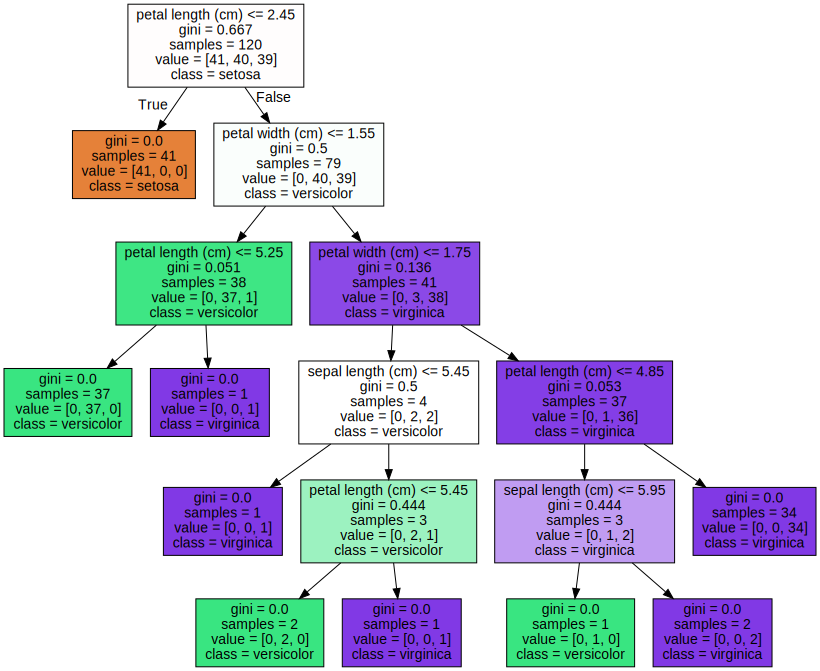

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot')as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


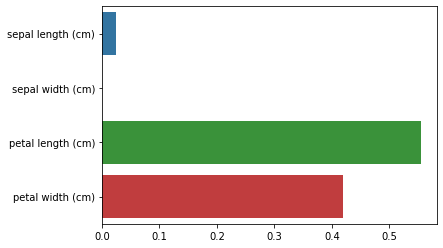

In [4]:
# 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서의 중요도 추출
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances: \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

> 여러 피처들 중 petal_length가 가장 피처 중요도가 높다. 

#### **d. 결정 트리 과적합 (Overfitting)**

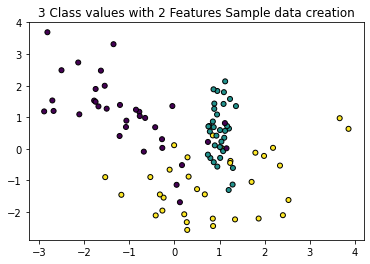

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [6]:
import numpy as np

# visualize_boundary() 함수
# Classifier의 Decision boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

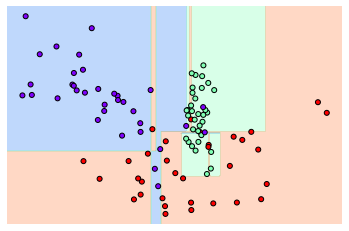

In [7]:
# 1. 하이퍼 파라미터가 디폴트인 Classifier를 학습하고, 결정 기준 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

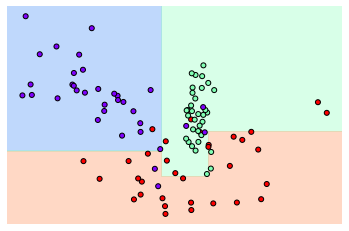

In [8]:
# 2. min_sample_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

> 결정 트리 모델의 예측 성능은 두 번째 모델이 더 뛰어날 가능성이 높다. 첫 번째 모델은 학습 데이터에 과적합되었기 때문에, 새로운 데이터에 대한 유연성이 떨어진다.

---

### **03. 앙상블 학습**

#### **a. 앙상블 학습 개요**
  - 정의
    - 여러 개의 분류기를 생성하고 그 예측을 결합함으로써, 보다 정확한 최종 예측을 도출하는 기법
  - 유형
    - 보팅
      - 서로 다른 알고리즘을 가진 분류기를 결합하는 방식
      - 선형 회귀, KNN, SVM 알고리즘
    - 배깅
      - 같은 유형의 알고리즘을 기반으로 하되, 데이터 샘플링을 서로 다르게 가져가면서(부트스트랩, Bootstrap) 학습을 수행해 보팅을 수행
      - 랜덤 포레스트 알고리즘
    - 부스팅
      - 여러 개의 분류기가 순차적으로 학습을 수행, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 방식
      - 그래디언트 부스트, XGBoost, LightGBM 알고리즘
    - 스태킹
      - 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방식

#### **b. 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**
  - 하드 보팅
    - 다수결 원칙과 유사
    - 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
  - 소프트 보팅
    - 일반적으로 사용되는 방식
    - 분류기의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
    

#### **c. 보팅 분류기(Voting Classifier)**
  - `VotingClassifier` : 보팅 방식의 앙상블을 구현한 클래스
  - 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측 및 분석


In [9]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


---

### **04. 랜덤 포레스트**

#### **a. 랜덤 포레스트의 개요 및 실습**
  - 배깅
     - 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘
  - 랜덤 포레스트는 배깅의 대표적인 알고리즘
    - 비교적 빠른 수행 속도를 가지며, 높은 예측 성능을 보인다.
    - 랜덤 포레스트는 여러 개의 데이터 세트를 중첩되게 분리하는 부트스트랩 분할 방식을 사용한다.
    - 이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용한다.
    - `RandomForestClassifier` : 랜덤 포레스트 기반의 분류기 생성

In [11]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+ '_' +str(x[1]) if x[1] >0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [13]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로, read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('features.txt', sep = '\s+',
                                header = None, names = ['column_index', 'column_name'])
  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
  X_train = pd.read_csv('X_train.txt', sep = '\s+', names = feature_name)
  X_test = pd.read_csv('X_test.txt', sep = '\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep = '\s+', header = None, names = ['action'])
  y_test = pd.read_csv('y_test.txt', sep = '\s+', header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### **b. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**
  - 랜덤 포레스트의 파라미터
    - `n_estimators`
      - 결정 트리의 개수를 지정
    - `max_features`
      - 결정 트리에 사용된 max_features 파라미터와 동일
      - 단, 디폴트값이 'None'이 아닌 'sqrt'로 설정
    - `max_depth`, `min_samples_leaf`와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 동일하게 적용

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
 }
# RandomForestClassifier 객체 생성 후 GridSearchCV
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [16]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 8,
                                 min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9196


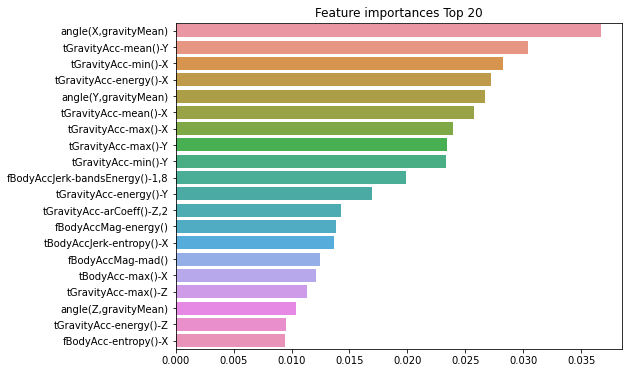

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### **05. GBM (Gradient Boosting Machine)**
  - 부스팅 알고리즘
    - 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
  - 대표적인 방식
    - AdaBoost
      - 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
    - Gradient Boost
      - AdaBoost와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 차이점
        - 경사 하강법(Gradient Descent)
          - 오류값을 최소화하는 방향으로 반복적으로 가중치 값을 업데이트하는 방식

#### **a. GBM 하이퍼 파라미터 및 튜닝**
  - GBM 파라미터
    - `loss`
      - 경사 하강법에서 사용할 비용 함수 지정
    - `learning_rate`
      - GBM이 학습을 진행할 때마다 적용하는 학습률
      - 너무 작은 값을 적용하면 업데이트 되는 값이 작아져 예측 성능이 높아질 가능성이 높지만, 시간이 오래 걸린다는 단점이 있다. 
      - 너무 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높지만, 빠른 수행이 가능하다. 
    - `n_estimators`
      - weak learner의 개수
    - `subsample`
      - weak learner가 학습에 사용하는 데이터 샘플링 비율 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1] 
}

gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 에측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: ignored

In [20]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

AttributeError: ignored